# Easy

In [109]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

#preparing data

df = pd.read_csv('..\\data\\clean\\merc.csv')

x = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [110]:
#training

model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

R2 Score: 0.8204014552454076


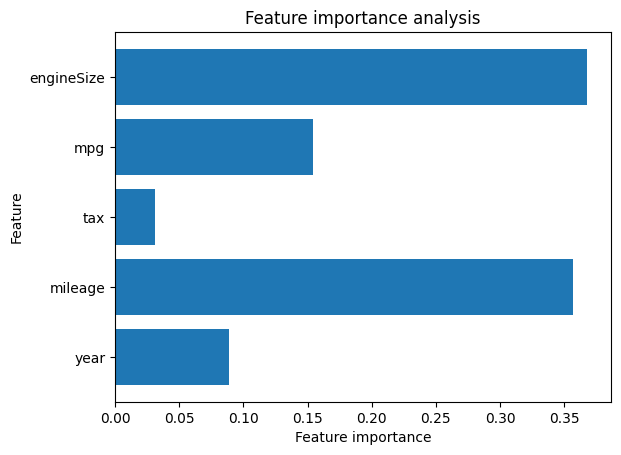

In [111]:
#testing 

y_pred = model.predict(x_test)
print(f'R2 Score: {r2_score(y_test, y_pred)}')

feature_importance = model.feature_importances_
plt.barh(x.columns, feature_importance)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.title('Feature importance analysis')
plt.show()

It seems valid that engine size and mileage are the most valuable features in the dataset. As for the engine, its size and price typically corresponds to the vehicle itself. Mileage plays a significant role too, since the more the car has passed during its utilization, the more used it is and the lower cost will be.


# Medium

In [112]:
import pathlib as pt

files = []

for path in pt.Path('..\\data\\clean').glob('*'):
    files.append(str(path))

print(files)    

['..\\data\\clean\\audi.csv', '..\\data\\clean\\bmw.csv', '..\\data\\clean\\cclass.csv', '..\\data\\clean\\focus.csv', '..\\data\\clean\\ford.csv', '..\\data\\clean\\hyundi.csv', '..\\data\\clean\\merc.csv', '..\\data\\clean\\skoda.csv', '..\\data\\clean\\toyota.csv', '..\\data\\clean\\vauxhall.csv', '..\\data\\clean\\vw.csv']


In [113]:
import pandas as pd
from sklearn.model_selection import train_test_split

df_list = [pd.read_csv(file) for file in files]
df = pd.concat(df_list, ignore_index=True)

print(f'Original dataset size: {len(df)}')

df = df.drop(labels='tax(£)', axis=1)

mean_tax = df['tax'].mean()
mean_mpg = df['tax'].mean()

df['tax'] = df['tax'].fillna(mean_tax, inplace=False)
df['mpg'] = df['mpg'].fillna(mean_tax, inplace=False)

print(f'Modified dataset size {len(df)}')

df = pd.get_dummies(df)

x = df.drop(labels='price', axis=1)
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=42)

Original dataset size: 108540
Modified dataset size 108540


In [114]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from time import time

# Initializing forest and hyperparameters

rf = RandomForestRegressor()
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [115]:
print("Training...")
t1 = time()
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='r2', n_jobs=-1, verbose=True)
rf_grid.fit(x_train, y_train)
t2 = time()
print(f'Spent {t2 - t1} seconds')

Training...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Spent 131.22932147979736 seconds


In [116]:
# testing

y_pred = rf_grid.best_estimator_.predict(x_test)
print(f'R2 Score: {r2_score(y_test, y_pred)}')

feature_importance = rf_grid.best_estimator_.feature_importances_
print(rf_grid.best_params_)

dct = dict(zip(x.columns, feature_importance))

sorted_keys = [key for key, value in sorted(dct.items(), key=lambda item: item[1], reverse=True)[:7]]
print(sorted_keys)

R2 Score: 0.9359429738308837
{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
['transmission_Manual', 'engineSize', 'year', 'mileage', 'mpg', 'model_ i8', 'tax']


The same consideration about feature importance. Have improved result from 0.82 to 0.94